In [1]:
from nba_api.stats.endpoints import leaguegamelog
from nba_api.stats.static import teams 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from termcolor import colored
import os

pd.options.mode.chained_assignment = None

In [22]:
season = '2023'
teams_info = teams.get_teams()

In [3]:
abbreviations = [x['abbreviation'] for x in teams_info]
print(abbreviations)

['ATL', 'BOS', 'CLE', 'NOP', 'CHI', 'DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL', 'MIA', 'MIL', 'MIN', 'BKN', 'NYK', 'ORL', 'IND', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'OKC', 'TOR', 'UTA', 'MEM', 'WAS', 'DET', 'CHA']


In [23]:
players_game_log = leaguegamelog.LeagueGameLog(season = season, player_or_team_abbreviation = 'P').get_data_frames()[0]
players_game_log.head()

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,FANTASY_PTS,VIDEO_AVAILABLE
0,22023,1629008,Michael Porter Jr.,1610612743,DEN,Denver Nuggets,0022300061,2023-10-24,DEN vs. LAL,W,...,12,2,2,0,0,1,12,12,35.4,1
1,22023,1641721,Maxwell Lewis,1610612747,LAL,Los Angeles Lakers,0022300061,2023-10-24,LAL @ DEN,L,...,0,0,0,0,0,0,0,0,0.0,1
2,22023,2544,LeBron James,1610612747,LAL,Los Angeles Lakers,0022300061,2023-10-24,LAL @ DEN,L,...,8,5,1,0,0,1,21,7,41.1,1
3,22023,202704,Reggie Jackson,1610612743,DEN,Denver Nuggets,0022300061,2023-10-24,DEN vs. LAL,W,...,3,1,1,0,2,0,8,11,14.1,1
4,22023,101108,Chris Paul,1610612744,GSW,Golden State Warriors,0022300062,2023-10-24,GSW vs. PHX,L,...,6,9,2,0,1,0,14,5,39.7,1


In [10]:
league_game_log = leaguegamelog.LeagueGameLog(season = season, player_or_team_abbreviation = 'T').get_data_frames()[0]
league_game_log.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22023,1610612747,LAL,Los Angeles Lakers,0022300061,2023-10-24,LAL @ DEN,L,240,41,...,31,44,23,5,4,12,18,107,-12,1
1,22023,1610612743,DEN,Denver Nuggets,0022300061,2023-10-24,DEN vs. LAL,W,240,48,...,33,42,29,9,6,12,15,119,12,1
2,22023,1610612756,PHX,Phoenix Suns,0022300062,2023-10-24,PHX @ GSW,W,240,42,...,43,60,23,5,7,19,22,108,4,1
3,22023,1610612744,GSW,Golden State Warriors,0022300062,2023-10-24,GSW vs. PHX,L,240,36,...,31,49,19,11,6,11,23,104,-4,1
4,22023,1610612763,MEM,Memphis Grizzlies,0022300071,2023-10-25,MEM vs. NOP,L,240,38,...,29,37,23,8,7,13,19,104,-7,1


In [11]:
columns = list(league_game_log.columns)[8:-1]
print(columns)

['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS']


In [18]:
team = 'MIL'
stat = 'PTS'
line = 241.5

n_last_games = 15

In [24]:
def get_team_games(team, games):
    games_dict = dict()
    games_dict['GAMES'] = games[games['TEAM_ABBREVIATION'] == team]
    games_dict['GAMES_OPP'] = games[(games['MATCHUP'].str.contains(team)) & (games['TEAM_ABBREVIATION'] != team)]
    games_dict['GAMES_HOME'] = games_dict['GAMES'][~games_dict['GAMES']['MATCHUP'].str.contains('@')]
    games_dict['GAMES_HOME_OPP'] = games_dict['GAMES_OPP'][games_dict['GAMES_OPP']['MATCHUP'].str.contains('@')]
    games_dict['GAMES_AWAY'] = games_dict['GAMES'][games_dict['GAMES']['MATCHUP'].str.contains('@')]
    games_dict['GAMES_AWAY_OPP'] = games_dict['GAMES_OPP'][~games_dict['GAMES_OPP']['MATCHUP'].str.contains('@')]
    return games_dict
    
def get_team_stat_means(team, games, stat, n_last_games):
    games = get_team_games(team, games)
    return team, games['GAMES'].iloc[-n_last_games:,:][stat].mean(), games['GAMES_OPP'].iloc[-n_last_games:,:][stat].mean(), games['GAMES_HOME'].iloc[-n_last_games:,:][stat].mean(), games['GAMES_HOME_OPP'].iloc[-n_last_games:,:][stat].mean(), games['GAMES_AWAY'].iloc[-n_last_games:,:][stat].mean(), games['GAMES_AWAY_OPP'].iloc[-n_last_games:,:][stat].mean()
    
rows = []
for team_abv in abbreviations:
    rows.append(get_team_stat_means(team_abv, league_game_log, stat, n_last_games))
    
teams_stats = pd.DataFrame(rows, columns=['TEAM', 'MADE', 'CONCEDED', 'HOME_MADE', 'HOME_CONCEDED', 'AWAY_MADE', 'AWAY_CONCEDED'])
# display(teams_stats)

In [41]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [42]:
def get_team_by_game(game_id, team_abv):
    game_players = players_game_log[(players_game_log['GAME_ID'] == game_id) & (players_game_log['TEAM_ABBREVIATION'] == team_abv)].sort_values(by='MIN', ascending=False).iloc[-n_last_games:,:]
    return game_players[['PLAYER_NAME', 'MIN', 'PTS', 'REB', 'AST']].iloc[:5]

In [43]:
lal = get_team_by_game('0022300061', 'LAL')
den = get_team_by_game('0022300061', 'DEN')
display_side_by_side(lal, den, titles=[''])

,PLAYER_NAME,MIN,PTS,REB,AST
33,D'Angelo Russell,36,11,4,7
36,Anthony Davis,34,17,8,4
17,Austin Reaves,31,14,8,4
31,Taurean Prince,30,18,3,1
2,LeBron James,29,21,8,5
,PLAYER_NAME,MIN,PTS,REB,AST
34,Nikola Jokic,36,29,13,11
35,Kentavious Caldwell-Pope,36,20,2,1
16,Aaron Gordon,35,15,7,5
32,Jamal Murray,34,21,2,6


In [20]:
def plot_save_chart(directory, title):
        
    plt.xticks(fontsize=10, rotation=90)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    plt.savefig(f"{directory}/{title}.jpg", dpi=100)
    
    plt.show()
    

def plot_stats_chart(team, games, stat):
    last_games = games.iloc[-n_last_games*2:,:]
    last_games['hue'] = last_games['TEAM_ABBREVIATION'].map(lambda x: 'Made' if x == team else 'Conceded')
    
    plt.figure(figsize=(12,8))
    sns.lineplot(data=last_games, x='GAME_DATE', y=stat, hue='hue', palette={
        'Made': 'g',
        'Conceded': 'r'
    })

    dates = last_games['GAME_DATE'].unique()
    
    for i in range(len(dates)):
        game = last_games[last_games['GAME_DATE'] == dates[i]].reset_index()
        host = 'A' if '@' in game.loc[0,'MATCHUP'] else 'H'
        plt.annotate(text=f"{i+1}:{host}", xy=(dates[i], game.loc[0, stat] + 1), fontsize=10)
        
    title = "{} - {} Made-Conceded Progression".format(team, stat)
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(stat)
    
    for xc in dates:
        plt.axvline(x=xc, color='black', linewidth=0.5)
    
    directory = f"../dist/{team}"
    
    plot_save_chart(directory, title)
    
def plot_totals_with_line(team, games, line, stat):
    last_games = games.iloc[-n_last_games*2:,:]
    dates = last_games['GAME_DATE'].unique()
    totals = last_games.groupby('GAME_DATE')[stat].sum()
    
    plt.figure(figsize=(16,10))
    sns.lineplot(x=dates, y=totals, label ='Totals')
    
    for i in range(len(dates)):
        host = 'A' if '@' in last_games.iloc[i,:]['MATCHUP'] else 'H'
        plt.annotate("{}:{}".format(i+1, host), (dates[i], totals[i] + 1), fontsize=10)
    
    title = "{} - {} Totals Progression".format(team, stat)
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('{} Totals'.format(stat))
    
    plt.axhline(y=line, color='r', linestyle='-')
    for xc in dates:
        plt.axvline(x=xc, color='black', linewidth=0.5)
    
    directory = f"../dist/{team}"
    
    plot_save_chart(directory, title)

def get_team_made_conceded_pct(games, opp_games, stat, line):
    made = np.array(games[stat])
    conceded = np.array(opp_games[stat])
    totals = made + conceded
    greater = (totals > line).sum()
    pct = greater*100/len(totals)
    return pct

def get_team_info(team, games, line, stat, n_last_games, is_home):
    overall_pct = get_team_made_conceded_pct(games['GAMES'].iloc[-n_last_games:,:], games['GAMES_OPP'].iloc[-n_last_games:,:], stat, line)
    print(f"\n{team} had their totals above {line} in {round(overall_pct, 2)}% of the last {n_last_games} games")
    if is_home:
        home_pct = get_team_made_conceded_pct(games['GAMES_HOME'].iloc[-n_last_games:,:], games['GAMES_HOME_OPP'].iloc[-n_last_games:,:], stat, line)
        print(f"At home, {team} had their totals above {line} in {round(overall_pct, 2)}% of the last {n_last_games} games")
    else:
        awat_pct = get_team_made_conceded_pct(games['GAMES_AWAY'].iloc[-n_last_games:,:], games['GAMES_AWAY_OPP'].iloc[-n_last_games:,:], stat, line)
        print(f"On the road, {team} had their totals above {line} in {round(awat_pct, 2)}% of the last {n_last_games} games")
        
def display_team_info(team, games, line, stat, n_last_games, is_home):
    games_dict = get_team_games(team, games)
    last_games = games_dict['GAMES'].iloc[-n_last_games:,:].reset_index(drop=True)
    last_games_opp = games_dict['GAMES_OPP'].iloc[-n_last_games:,:].reset_index(drop=True)
    
    print(f"LAST {n_last_games} GAMES:")
    for i, row in last_games.iterrows():
        matchup_char = '@' if '@' in row['MATCHUP'] else 'X'
        opp_stat = last_games_opp.loc[i,stat]
        opp = last_games_opp.loc[i,'TEAM_ABBREVIATION']
        stat_diff = row[stat]-last_games_opp.loc[i,stat]
        
        game_string = f"{i+1}: {team} {row[stat]} {matchup_char} {opp_stat} {opp} // Diff: {stat_diff}"
        
        print(colored(game_string, 'green' if row['WL'] == 'W' else 'red'))
    
    get_team_info(team, games_dict, line, stat, n_last_games, is_home)

    filtered_games = games[games['MATCHUP'].str.contains(team)]
    
    plot_stats_chart(team, filtered_games, stat)
    plot_totals_with_line(team, filtered_games, line, stat)


LAST 15 GAMES:
1: MIL 116 @ 119 BOS // Diff: -3
2: MIL 131 X 128 WAS // Diff: 3
3: MIL 108 X 102 POR // Diff: 6
4: MIL 131 @ 124 MIA // Diff: 7
5: MIL 113 @ 120 CHI // Diff: -7
6: MIL 132 X 121 ATL // Diff: 11
7: MIL 146 X 122 NYK // Diff: 24
8: MIL 119 X 128 IND // Diff: -9
9: MIL 133 X 129 CHI // Diff: 4
10: MIL 140 X 126 IND // Diff: 14
11: MIL 146 X 114 DET // Diff: 32
12: MIL 128 X 119 HOU // Diff: 9
13: MIL 132 X 119 SAS // Diff: 13
14: MIL 118 X 114 ORL // Diff: 4
15: MIL 130 @ 111 NYK // Diff: 19

MIL had their totals above 241.5 in 66.67% of the last 15 games
At home, MIL had their totals above 241.5 in 66.67% of the last 15 games


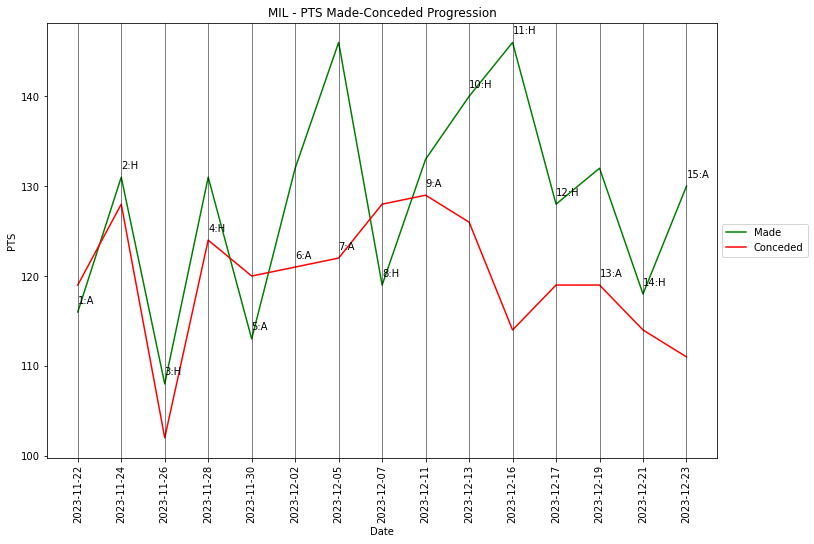

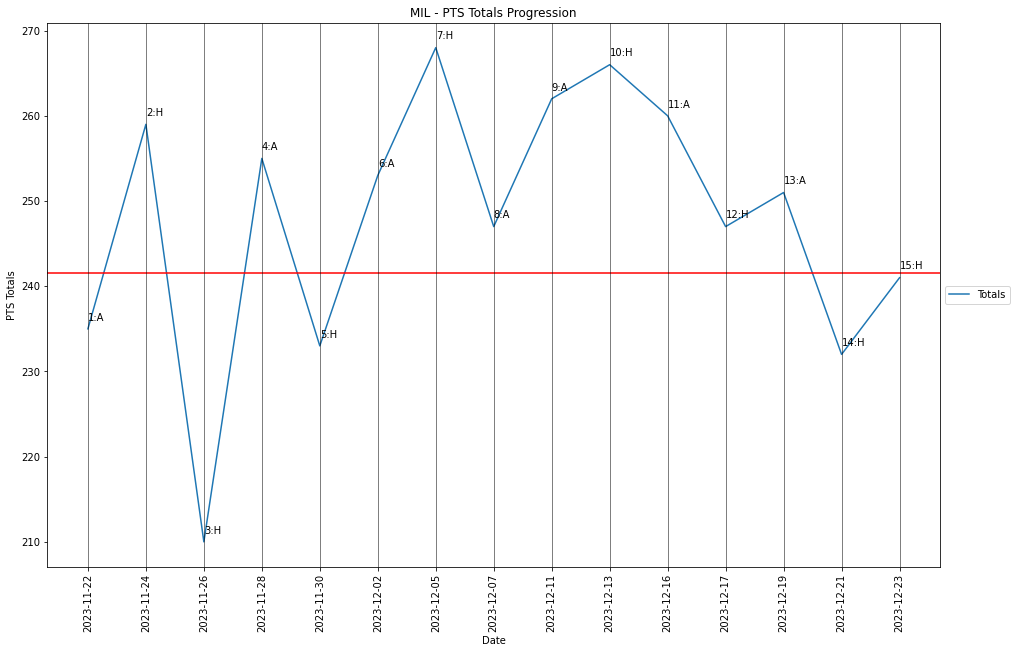

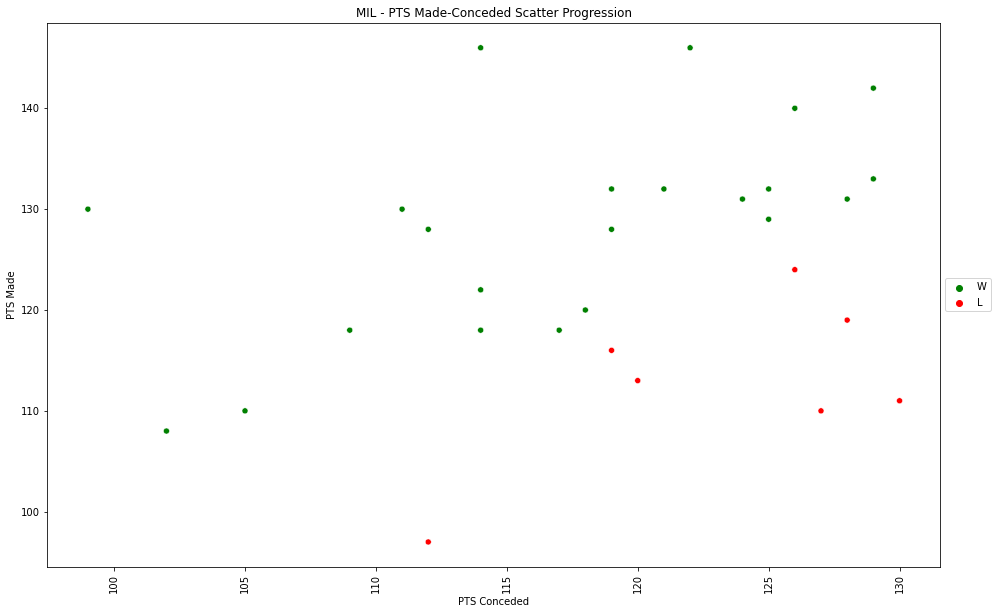

In [21]:
display_team_info(team, league_game_log, line, stat, n_last_games, True)